# モジュールのインポート

In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

%matplotlib inline

# パラメータ設定

In [2]:
np.random.seed(0)

A = np.random.rand(30,40)
w = np.ones((40,1))
b = A.dot(w)
xi = 1e-4
tau = 0.5
l = 0.1
x_0 = np.zeros((40,1))
eps = 1e-10
cpu_time_max = 300

# 凸の場合

In [3]:
x_star = w

In [4]:
def f(x):
    return (b - A.dot(x)).T.dot(b - A.dot(x))

def df(x):
    return 2 * A.T.dot(A).dot(x) - 2 * A.T.dot(b)

def error(x):
    return f(x) - f(x_star)

def armijo(x):
    k = 0
    while(True):
        if f(x + tau**k * (-df(x))) <= f(x) + xi * tau**k * df(x).T.dot(-df(x)):
            break
        k += 1
    return tau**k

In [5]:
x = x_0
err_hist_1_1 = []
while(True):
    err = error(x)
    err_hist_1_1.append(err[0,0])
    if err < eps:
        break
        
    x = x - armijo(x) * df(x)

Text(0, 0.5, 'logarithmic error')

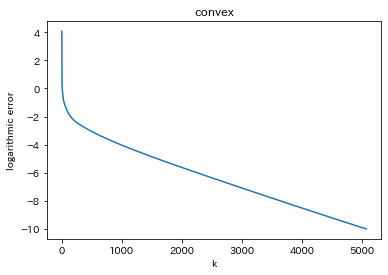

In [6]:
plt.plot([i for i in range(len(err_hist_1_1))], list(map(lambda h: math.log10(h), err_hist_1_1)))
plt.title('convex')
plt.xlabel('k')
plt.ylabel('logarithmic error')

In [7]:
x = x_0
err_hist_2_1 = []
s = 0
t1 = time.time()
t_cumu_1 = []
while(True):
    err = error(x)
    t2 = time.time()
    elapsed = t2 - t1
    if elapsed > s:
        t_cumu_1.append(elapsed)
        err_hist_2_1.append(err[0,0])
        s += 1
        if elapsed > cpu_time_max:
            break
        
    x = x - armijo(x) * df(x)

Text(0, 0.5, 'cpu time')

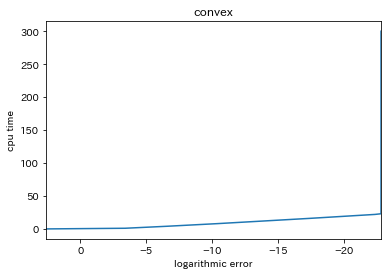

In [8]:
log_err_hist_2_1 = list(map(lambda h: math.log10(h), err_hist_2_1))
plt.plot(log_err_hist_2_1, t_cumu_1)
plt.title('convex')
plt.xlim([max(log_err_hist_2_1), min(log_err_hist_2_1)])
plt.xlabel('logarithmic error')
plt.ylabel('cpu time')

# 強凸の場合

In [9]:
x_star = np.linalg.inv(A.T.dot(A) + l * np.eye(40)).dot(A.T).dot(b)

In [10]:
def f(x):
    return (b - A.dot(x)).T.dot(b - A.dot(x)) + l * x.T.dot(x)

def df(x):
    return 2 * (A.T.dot(A) + l * np.eye(40)).dot(x) - 2 * A.T.dot(b)

def error(x):
    return f(x) - f(x_star)

def armijo(x):
    k = 0
    while(True):
        if f(x + tau**k * (-df(x))) <= f(x) + xi * tau**k * df(x).T.dot(-df(x)):
            break
        k += 1
    return tau**k

In [11]:
x = x_0
err_hist_1_2 = []

while(True):
    
    err = error(x)
    err_hist_1_2.append(err[0,0])
    if err < eps:
        break
        
    x = x - armijo(x) * df(x)

Text(0, 0.5, 'logarithmic error')

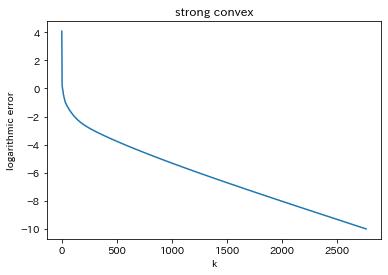

In [12]:
plt.plot([i for i in range(len(err_hist_1_2))], list(map(lambda h: math.log10(h), err_hist_1_2)))
plt.title('strong convex')
plt.xlabel('k')
plt.ylabel('logarithmic error')

In [13]:
x = x_0
err_hist_2_2 = []
s = 0
t1 = time.time()
t_cumu_2 = []
while(True):
    err = error(x)
    t2 = time.time()
    elapsed = t2 - t1
    if elapsed > s:
        t_cumu_2.append(elapsed)
        err_hist_2_2.append(err[0,0])
        s += 1
        if elapsed > cpu_time_max:
            break
        
    x = x - armijo(x) * df(x)

Text(0, 0.5, 'cpu time')

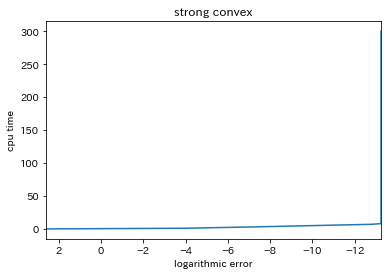

In [14]:
log_err_hist_2_2 = list(map(lambda h: math.log10(h), err_hist_2_2))
plt.plot(log_err_hist_2_2, t_cumu_2)
plt.title('strong convex')
plt.xlim([max(log_err_hist_2_2), min(log_err_hist_2_2)])
plt.xlabel('logarithmic error')
plt.ylabel('cpu time')

# 凸 + 加速の場合

In [15]:
x_star = w

In [16]:
def f(x):
    return (b - A.dot(x)).T.dot(b - A.dot(x))

def df(x):
    return 2 * A.T.dot(A).dot(x) - 2 * A.T.dot(b)

def error(x):
    return f(x) - f(x_star)

def armijo(x):
    k = 0
    while(True):
        if f(x + tau**k * (-df(x))) <= f(x) + xi * tau**k * df(x).T.dot(-df(x)):
            break
        k += 1
    return tau**k

In [17]:
x = x_0
x_hist = [x_0, x_0]
err_hist_1_3 = []
k = 1

while(True):
    
    err = error(x)
    err_hist_1_3.append(err[0,0])
    if err < eps:
        break
    
    x_pre = x_hist[-2]
    alpha = armijo(x)
    beta = k/(k+3)
    x = x + beta * (x - x_pre) - alpha * df(x + beta * (x - x_pre))
    x_hist.append(x)
    k += 1

Text(0, 0.5, 'logarithmic error')

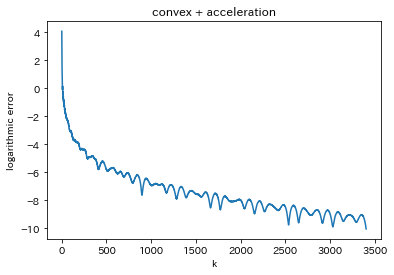

In [18]:
plt.plot([i for i in range(len(err_hist_1_3))], list(map(lambda h: math.log10(h), err_hist_1_3)))
plt.title('convex + acceleration')
plt.xlabel('k')
plt.ylabel('logarithmic error')

In [19]:
x = x_0
x_hist = [x_0, x_0]
err_hist_2_3 = []
k = 1
s = 0
t1 = time.time()
t_cumu_3 = []

while(True):
    err = error(x)
    t2 = time.time()
    elapsed = t2 - t1
    if elapsed > s:
        t_cumu_3.append(elapsed)
        err_hist_2_3.append(err[0,0])
        s += 1
        if elapsed > cpu_time_max:
            break
        
    x_pre = x_hist[-2]
    alpha = armijo(x)
    beta = k/(k+3)
    x = x + beta * (x - x_pre) - alpha * df(x + beta * (x - x_pre))
    x_hist.append(x)
    k += 1

Text(0, 0.5, 'cpu time')

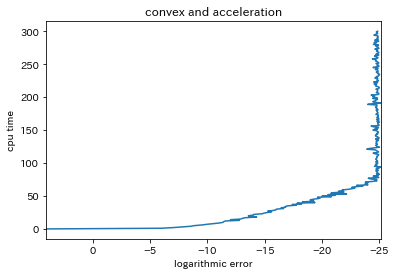

In [20]:
log_err_hist_2_3 = list(map(lambda h: math.log10(h), err_hist_2_3))
plt.plot(log_err_hist_2_3, t_cumu_3)
plt.title('convex and acceleration')
plt.xlim([max(log_err_hist_2_3), min(log_err_hist_2_3)])
plt.xlabel('logarithmic error')
plt.ylabel('cpu time')

# 図の保存

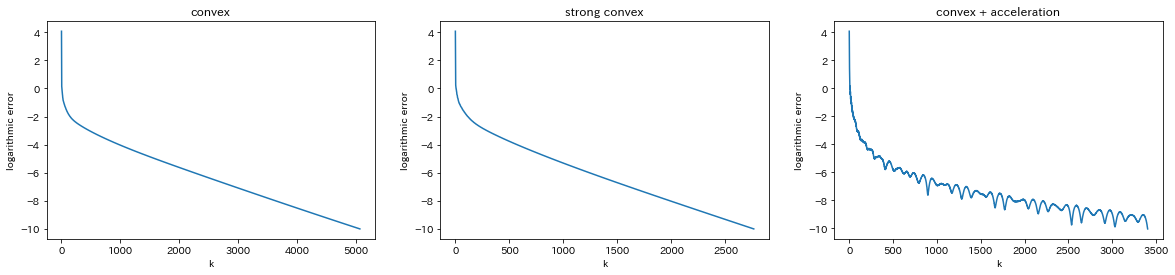

In [21]:
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.plot([i for i in range(len(err_hist_1_1))], list(map(lambda h: math.log10(h), err_hist_1_1)))
ax1.set_title('convex')
ax1.set_xlabel('k')
ax1.set_ylabel('logarithmic error')

ax2.plot([i for i in range(len(err_hist_1_2))], list(map(lambda h: math.log10(h), err_hist_1_2)))
ax2.set_title('strong convex')
ax2.set_xlabel('k')
ax2.set_ylabel('logarithmic error')

ax3.plot([i for i in range(len(err_hist_1_3))], list(map(lambda h: math.log10(h), err_hist_1_3)))
ax3.set_title('convex + acceleration')
ax3.set_xlabel('k')
ax3.set_ylabel('logarithmic error')

plt.savefig('figure1.png')

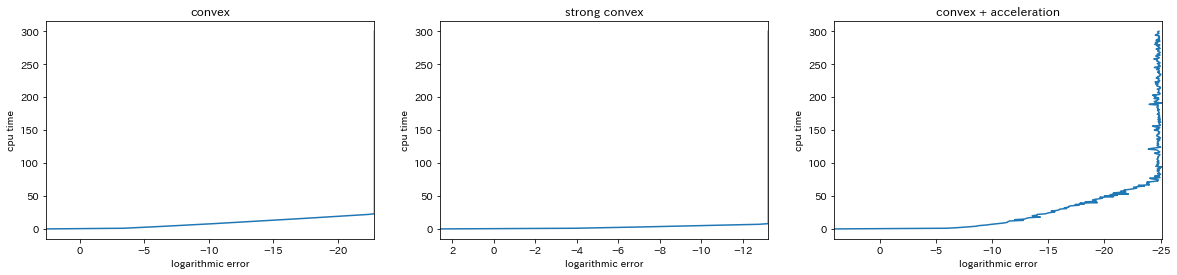

In [22]:
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

log_err_hist_2_1 = list(map(lambda h: math.log10(h), err_hist_2_1))
ax1.plot(log_err_hist_2_1, t_cumu_1)
ax1.set_title('convex')
ax1.set_xlim([max(log_err_hist_2_1), min(log_err_hist_2_1)])
ax1.set_xlabel('logarithmic error')
ax1.set_ylabel('cpu time')

log_err_hist_2_2 = list(map(lambda h: math.log10(h), err_hist_2_2))
ax2.plot(log_err_hist_2_2, t_cumu_2)
ax2.set_title('strong convex')
ax2.set_xlim([max(log_err_hist_2_2), min(log_err_hist_2_2)])
ax2.set_xlabel('logarithmic error')
ax2.set_ylabel('cpu time')

log_err_hist_2_3 = list(map(lambda h: math.log10(h), err_hist_2_3))
ax3.plot(log_err_hist_2_3, t_cumu_3)
ax3.set_title('convex + acceleration')
ax3.set_xlim([max(log_err_hist_2_3), min(log_err_hist_2_3)])
ax3.set_xlabel('logarithmic error')
ax3.set_ylabel('cpu time')

plt.savefig('figure2.png')